-u1*x + u2*(x + 1)


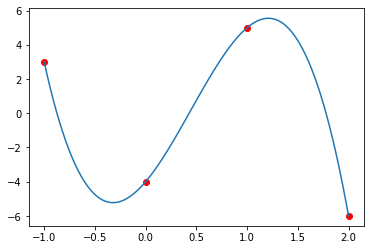

In [4]:
from sympy import Symbol, simplify, lambdify
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator


def interpolate_lagrange(x, x_values, y_values):
    """
    x : value at which to evaluate y, should be between min and max x_values
    x_values: list or numpy array containing values of x
    y_values: list or numpy array contaning values of y
    """
    def _basis(j):
        p = [(x - x_values[m])/(x_values[j] - x_values[m]) for m in range(k) if m != j]
        return reduce(operator.mul, p)
    assert len(x_values) != 0 and (len(x_values) == len(y_values)), 'x and y cannot be empty and must have the same length'
    k = len(x_values)
    return sum(_basis(j)*y_values[j] for j in range(k)) 

x = Symbol('x')
print(interpolate_lagrange(x,[-1, 0],[Symbol('u1'),Symbol('u2')]))
poly = simplify(interpolate_lagrange(x,[-1, 0, 1, 2],[3,-4, 5, -6]))

x1 = np.linspace(-1, 2, 100)
y1 = lambdify(x, poly)(x1)

fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.scatter([-1, 0, 1, 2],[3,-4, 5, -6], c = 'r')
plt.show()